In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# =======================================
# Load the Nvidia Stock Dataset
# =======================================

stock_data = pd.read_csv('nvidia_stock_data.csv')

# Display the first few rows of the dataset
print(stock_data.head(), '\n\n')

# Display the summary information of the dataset
print(stock_data.info(), '\n\n')

         Date     Close      High       Low      Open      Volume
0  1999-01-22  0.037612  0.044775  0.035581  0.040119  2714688000
1  1999-01-25  0.041552  0.042029  0.037612  0.040597   510480000
2  1999-01-26  0.038328  0.042865  0.037731  0.042029   343200000
3  1999-01-27  0.038209  0.039403  0.036298  0.038447   244368000
4  1999-01-28  0.038089  0.038447  0.037850  0.038209   227520000 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6637 non-null   object 
 1   Close   6637 non-null   float64
 2   High    6637 non-null   float64
 3   Low     6637 non-null   float64
 4   Open    6637 non-null   float64
 5   Volume  6637 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 311.2+ KB
None 




In [2]:
# Display the summary statistics of the dataset
print(stock_data.describe())

             Close         High          Low         Open        Volume
count  6637.000000  6637.000000  6637.000000  6637.000000  6.637000e+03
mean     10.091263    10.279293     9.885371    10.091765  5.952182e+08
std      26.686641    27.192558    26.140134    26.706411  4.297521e+08
min       0.031283     0.032597     0.030566     0.032000  1.968000e+07
25%       0.259741     0.266981     0.251946     0.259053  3.333360e+08
50%       0.440848     0.447144     0.434353     0.440676  4.961320e+08
75%       4.888134     4.957336     4.810735     4.895365  7.269720e+08
max     149.416245   153.115916   147.806407   153.015919  9.230856e+09


In [3]:
# =======================================
# Check for Missing Values in the Dataset
# =======================================

missing_values = stock_data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values, '\n\n')

# No missing values found, so we can proceed with the analysis.

Missing Values in Each Column:
 Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64 




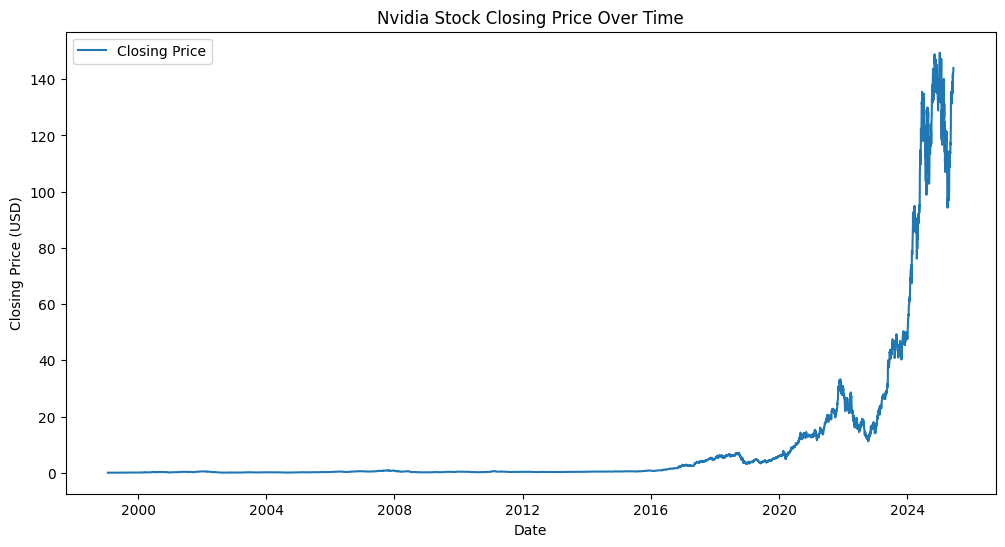

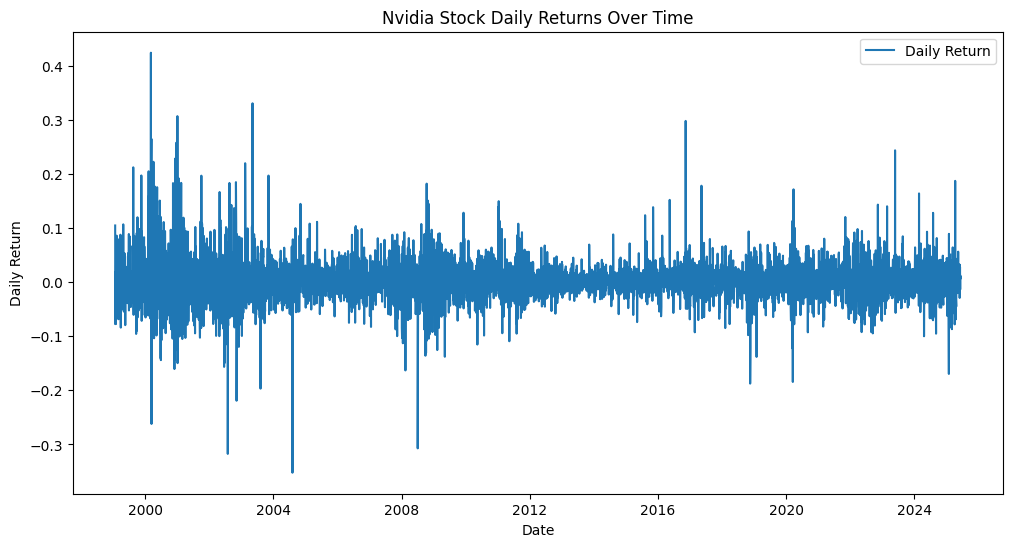

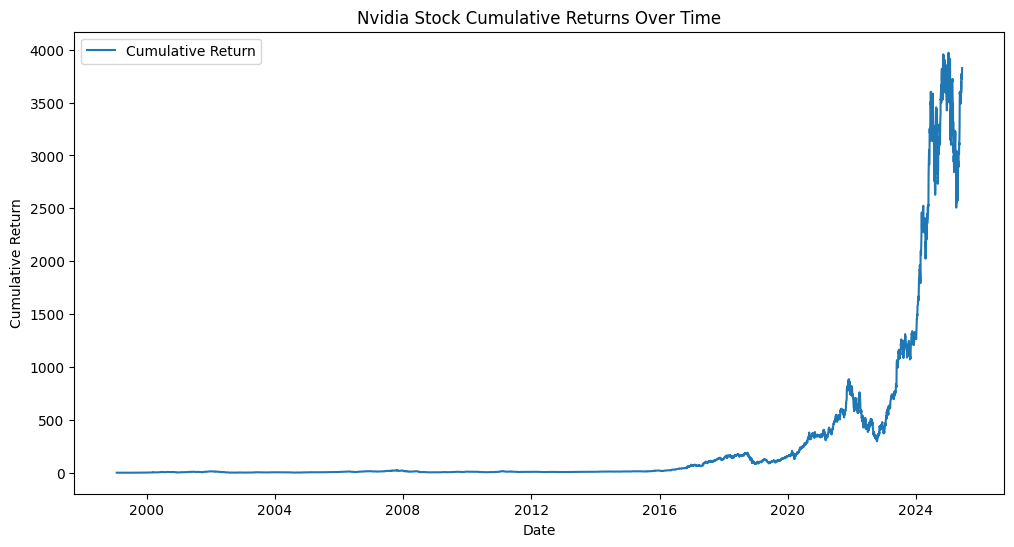

In [4]:
# ==================================================
# Analysis of Stock Closing Price Trends and Returns
# ==================================================

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data['Daily Return'] = stock_data['Close'].pct_change()
stock_data['Cumulative Return'] = (1 + stock_data['Daily Return']).cumprod() - 1

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price')
plt.title('Nvidia Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

# Plot the daily returns over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Daily Return', data=stock_data, label='Daily Return')
plt.title('Nvidia Stock Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

# Plot the cumulative returns over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Cumulative Return', data=stock_data, label='Cumulative Return')
plt.title('Nvidia Stock Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

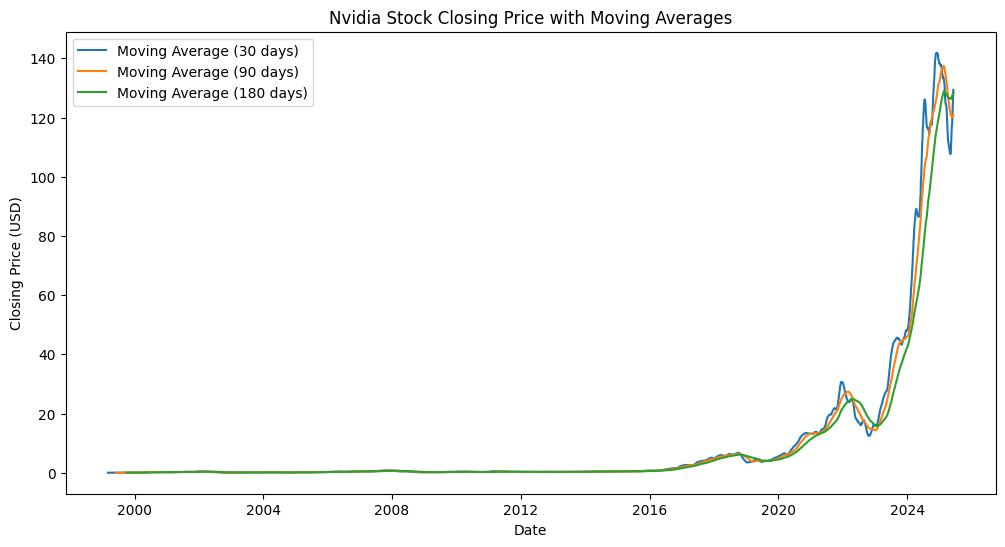

In [5]:
# =======================================
# Calculate and Plot Moving Averages
# =======================================

# Calculate moving averages for 30, 90 and 180 days
stock_data['MA_30'] = stock_data['Close'].rolling(window=30).mean()
stock_data['MA_90'] = stock_data['Close'].rolling(window=90).mean()
stock_data['MA_180'] = stock_data['Close'].rolling(window=180).mean()

# Plot the Moving Averages
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='MA_30', data=stock_data, label='Moving Average (30 days)')
sns.lineplot(x='Date', y='MA_90', data=stock_data, label='Moving Average (90 days)')
sns.lineplot(x='Date', y='MA_180', data=stock_data, label='Moving Average (180 days)')
plt.title('Nvidia Stock Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

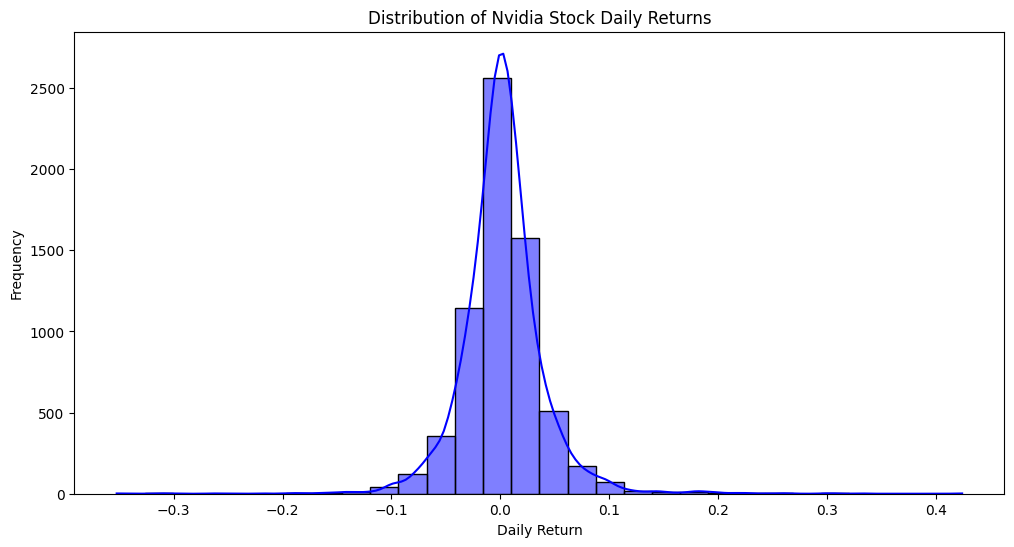

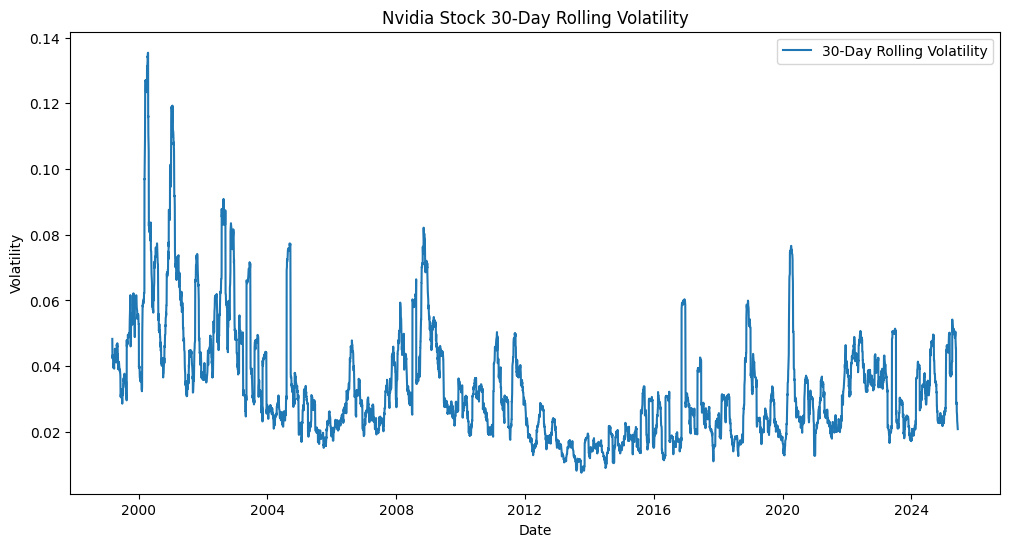

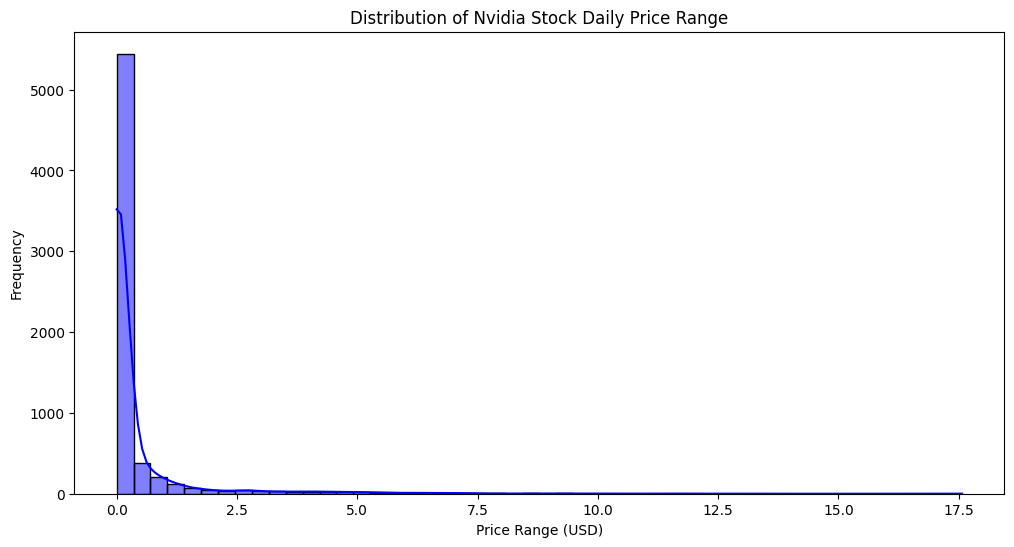

In [6]:
# ===============================================
# Distribution of Daily Returns and Voltatility
# ===============================================

# Plot the distribution of daily returns
plt.figure(figsize=(12, 6))
sns.histplot(stock_data['Daily Return'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Nvidia Stock Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Plot the 30-day rolling volatility
stock_data['Volatility'] = stock_data['Daily Return'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volatility', data=stock_data, label='30-Day Rolling Volatility')
plt.title('Nvidia Stock 30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Plot the distribution of Daily Price Range
stock_data['Price Range'] = stock_data['High'] - stock_data['Low']
plt.figure(figsize=(12, 6))
sns.histplot(stock_data['Price Range'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribution of Nvidia Stock Daily Price Range')
plt.xlabel('Price Range (USD)')
plt.ylabel('Frequency')
plt.show()


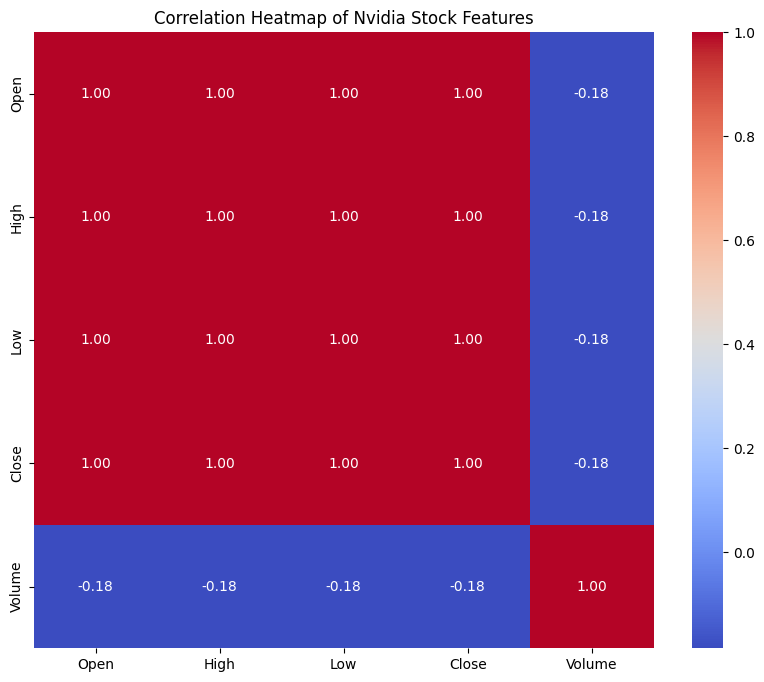

In [7]:
# =======================================
# Correlation Analysis
# =======================================

original_features = ['Open', 'High', 'Low', 'Close', 'Volume']
correlation_matrix = stock_data[original_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Nvidia Stock Features')
plt.show()

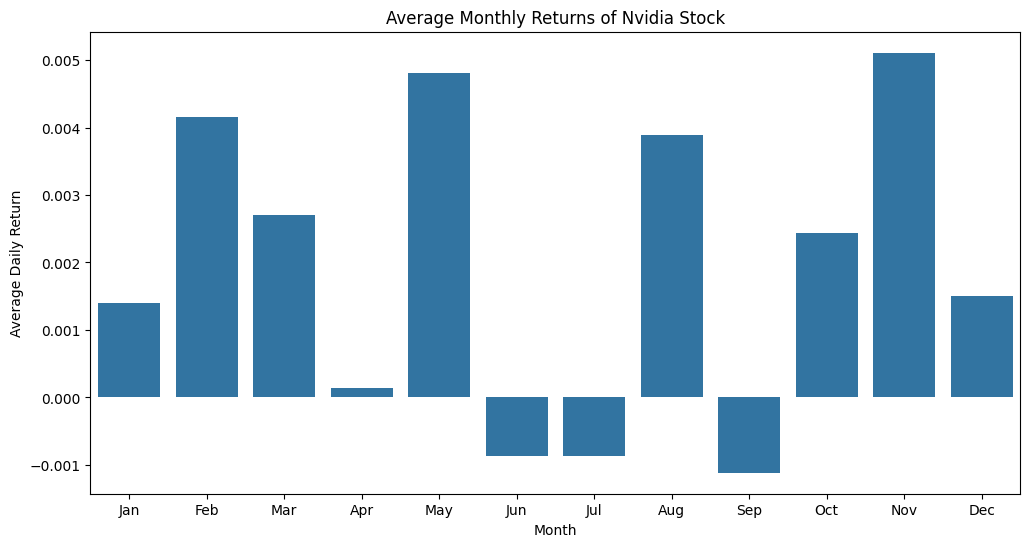

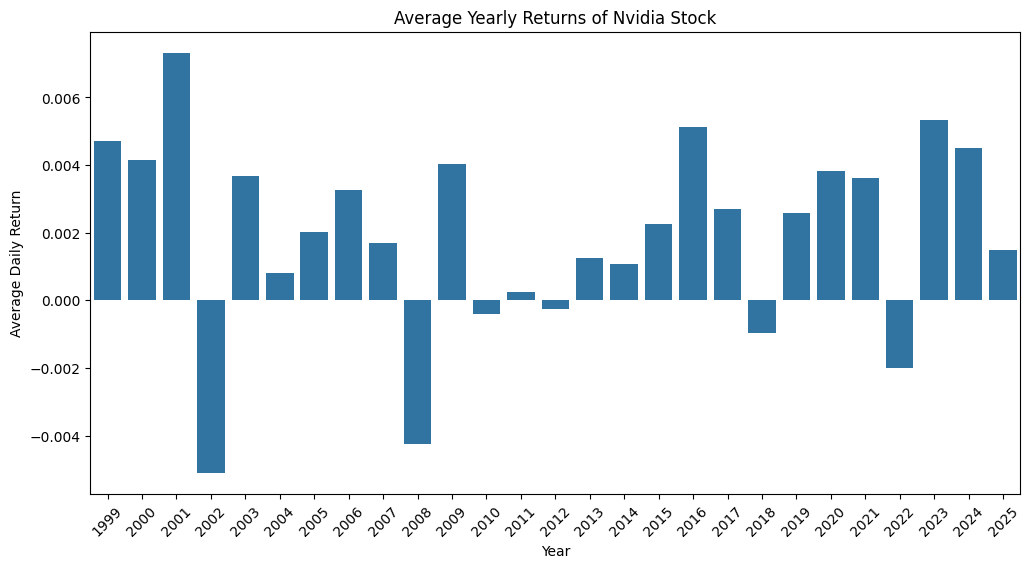

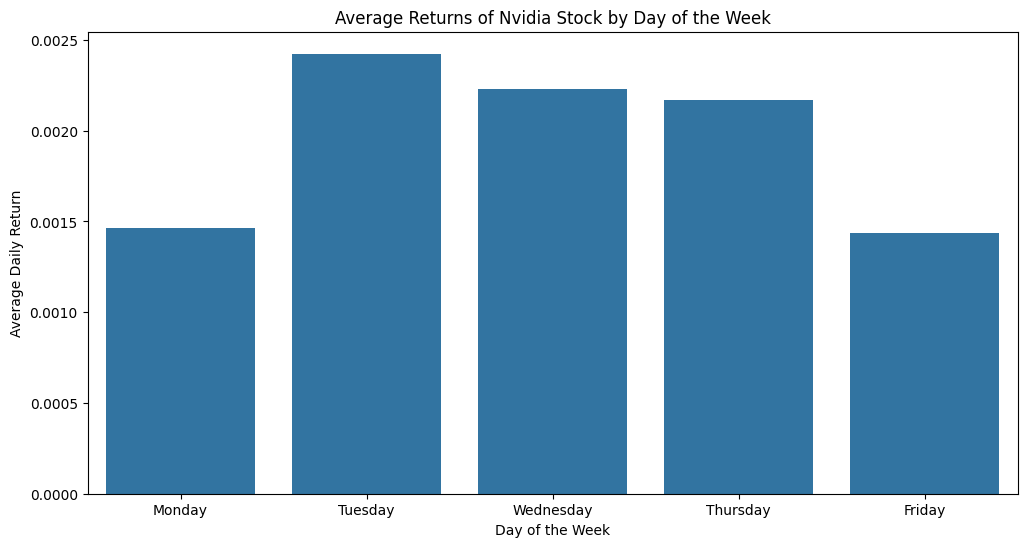

In [8]:
# =======================================
# Seasonality Analysis
# =======================================

# Extract day, month, and year from the date
stock_data['Day'] = stock_data['Date'].dt.day
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Year'] = stock_data['Date'].dt.year

# Monthly Average Returns
monthly_avg_returns = stock_data.groupby('Month')['Daily Return'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg_returns.index, y=monthly_avg_returns.values)
plt.title('Average Monthly Returns of Nvidia Stock')
plt.xlabel('Month')
plt.ylabel('Average Daily Return')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Yearly Average Returns
yearly_avg_returns = stock_data.groupby('Year')['Daily Return'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_avg_returns.index, y=yearly_avg_returns.values)
plt.title('Average Yearly Returns of Nvidia Stock')
plt.xlabel('Year')
plt.ylabel('Average Daily Return')
plt.xticks(rotation=45)
plt.show()

# Average Returns by Day of the Week
stock_data['Day of Week'] = stock_data['Date'].dt.day_name()
avg_returns_by_day = stock_data.groupby('Day of Week')['Daily Return'].mean()
avg_returns_by_day = avg_returns_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_returns_by_day.index, y=avg_returns_by_day.values)
plt.title('Average Returns of Nvidia Stock by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Return')
plt.show()

ADF Statistic: 3.2475
ADF Test p-value for Stationarity: 1.0000 

ADF Statistic after Differencing: -12.6403
ADF Test p-value after Differencing: 0.0000 



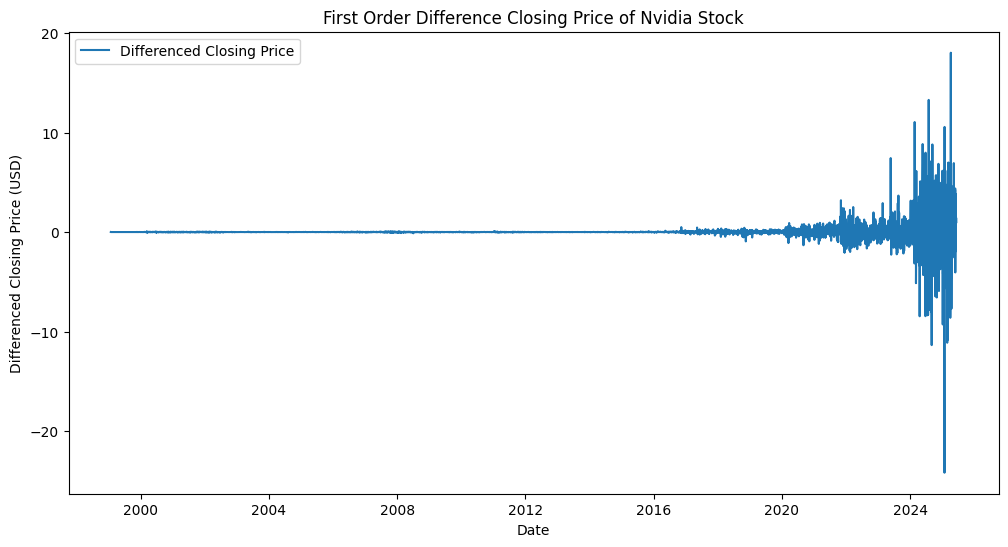

In [ ]:
# =======================================
# ADF Test for Stationarity
# =======================================

from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(stock_data['Close'].dropna())
adf_statistic = adf_test[0]
print(f'ADF Statistic: {adf_statistic:.4f}')    
p_value = adf_test[1]
print(f'ADF Test p-value for Stationarity: {p_value:.4f} \n')

# As p_value = 1.0, we fail to reject the null hypothesis of non-stationarity.
# First Order Differencing to make the series stationary

stock_data['Diff_Close'] = stock_data['Close'].diff()

adf_test_diff = adfuller(stock_data['Diff_Close'].dropna())
adf_statistic_diff = adf_test_diff[0]
print(f'ADF Statistic after Differencing: {adf_statistic_diff:.4f}')
p_value_diff = adf_test_diff[1]
print(f'ADF Test p-value after Differencing: {p_value_diff:.4f} \n')

# As p_value_diff < 0.05, we reject the null hypothesis 
# The differenced series is stationary
# Plotting the differenced series

plt.figure(figsize=(12,6))
sns.lineplot(x=stock_data['Date'], y=stock_data['Diff_Close'], label='Differenced Closing Price')
plt.title('First Order Difference Closing Price of Nvidia Stock')
plt.xlabel('Date')
plt.ylabel('Differenced Closing Price (USD)')
plt.show()